In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
from scipy.stats import norm
from scipy import stats
import re
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
train_data=pd.read_csv('train.csv',index_col='PassengerId')
answer_data=pd.read_csv('test.csv',index_col='PassengerId')


In [3]:
data=train_data[train_data['Survived']==1].fillna(-1)['Fare']
a=pd.DataFrame(pd.value_counts(data,bins=range(-10,int(data.max()+10),10),sort=False,dropna=False))
data=train_data[train_data['Survived']==0].fillna(-1)['Fare']
b=pd.DataFrame(pd.value_counts(data,bins=range(-10,int(data.max()+10),10),sort=False,dropna=False))
c=pd.concat([a,b],axis=1,).fillna(0)
c.columns=['survived','notSurvived']
print(c)

                survived  notSurvived
(-10.001, 0.0]         1         14.0
(0.0, 10.0]           66        255.0
(10.0, 20.0]          76        103.0
(20.0, 30.0]          63         79.0
(30.0, 40.0]          23         35.0
(40.0, 50.0]           4         12.0
(50.0, 60.0]          27         11.0
(60.0, 70.0]           6         11.0
(70.0, 80.0]          19         12.0
(80.0, 90.0]          14          3.0
(90.0, 100.0]          4          0.0
(100.0, 110.0]         2          2.0
(110.0, 120.0]         9          2.0
(120.0, 130.0]         0          0.0
(130.0, 140.0]         6          1.0
(140.0, 150.0]         2          0.0
(150.0, 160.0]         4          3.0
(160.0, 170.0]         2          0.0
(170.0, 180.0]         0          0.0
(180.0, 190.0]         0          0.0
(190.0, 200.0]         0          0.0
(200.0, 210.0]         0          0.0
(210.0, 220.0]         3          1.0
(220.0, 230.0]         3          2.0
(230.0, 240.0]         0          0.0
(240.0, 250.

               survived  notSurvived
(-5.001, 0.0]        52        125.0
(0.0, 5.0]           31         13.0
(5.0, 10.0]           7         13.0
(10.0, 15.0]         11          8.0
(15.0, 20.0]         33         63.0
(20.0, 25.0]         42         80.0
(25.0, 30.0]         42         66.0
(30.0, 35.0]         41         47.0
(35.0, 40.0]         28         39.0
(40.0, 45.0]         17         30.0
(45.0, 50.0]         16         23.0
(50.0, 55.0]         10         14.0
(55.0, 60.0]          7         11.0
(60.0, 65.0]          4         10.0
(65.0, 70.0]          0          3.0
(70.0, 75.0]          0          4.0
(75.0, 80.0]          1          0.0


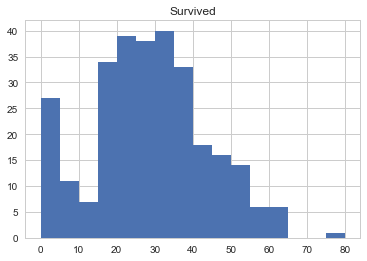

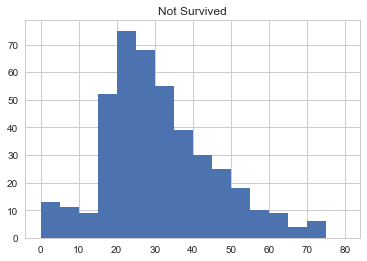

In [4]:
#data=train_data.fillna(-1)['Age']
#pd.DataFrame(pd.value_counts(data,bins=range(-50,int(data.max()+50),50),sort=False,dropna=False))

data=train_data[train_data['Survived']==1].fillna(-1)['Age']
a=pd.DataFrame(pd.value_counts(data,bins=range(-5,int(data.max()+5),5),sort=False,dropna=False))
data=train_data[train_data['Survived']==0].fillna(-1)['Age']
b=pd.DataFrame(pd.value_counts(data,bins=range(-5,int(data.max()+5),5),sort=False,dropna=False))
c=pd.concat([a,b],axis=1,).fillna(0)
c.columns=['survived','notSurvived']
print(c)

plt.hist(train_data[train_data['Survived']==1].fillna(-1)['Age'],bins=range(0,85,5))
plt.title('Survived')
plt.show()
plt.hist(train_data[train_data['Survived']==0].fillna(-1)['Age'],bins=range(0,85,5))
plt.title('Not Survived')
plt.show()


In [5]:
test_set=train_data.sample(frac=0.3,random_state=20)
train_set=train_data.drop(test_set.index)
answer_set=answer_data

print(train_set.shape)
print(test_set.shape)
print(answer_set.shape)

train_set=train_set.replace({'Pclass': {1: '1st',2:'2nd',3:'3rd'}})
test_set=test_set.replace({'Pclass': {1: '1st',2:'2nd',3:'3rd'}})
answer_set=answer_set.replace({'Pclass': {1: '1st',2:'2nd',3:'3rd'}})

#Embarked遺缺值刪除
train_set['Embarked']=train_set['Embarked'].fillna('S')
train_set=train_set[train_set['Embarked']!='missing']
#Age遺缺值根據存活與否給平均數
avg_age0=train_set['Age'].mean()
train_set.loc[train_set['Sex']=='male','Age']=train_set.loc[train_set['Sex']=='male','Age'].fillna(avg_age0)
train_set.loc[train_set['Sex']=='female','Age']=train_set.loc[train_set['Sex']=='female','Age'].fillna(avg_age0)

train_set['Fare']=train_set['Fare'].fillna(train_set['Fare'].mean())
avg_age0=train_set.loc[train_set['Sex']=='male','Fare'].mean()
avg_age1=train_set.loc[train_set['Sex']=='female','Fare'].mean()
train_set.loc[train_set['Sex']=='male','Fare']=train_set.loc[train_set['Sex']=='male','Fare'].fillna(avg_age0)
train_set.loc[train_set['Sex']=='female','Fare']=train_set.loc[train_set['Sex']=='female','Fare'].fillna(avg_age1)

train_set['Cabin']=train_set['Cabin'].fillna('Missing')
train_set['Cabin']=[x[:1] for x in train_set['Cabin']]
train_set=train_set.replace({'Cabin': {'T': 'M'}})
train_set['totalFamily']=train_set['Parch']+train_set['SibSp']
train_set.loc[train_set['totalFamily']!=0,'isAlone']=1
train_set.loc[train_set['totalFamily']==0,'isAlone']=0

#---------------------------------------------------------------------
test_set['Embarked']=test_set['Embarked'].fillna('S')
test_set=test_set[test_set['Embarked']!='missing']
#test_set['Age']=test_set['Age'].fillna(test_set['Age'].mean())
test_set['Fare']=test_set['Fare'].fillna(test_set['Fare'].mean())
test_set['Cabin']=test_set['Cabin'].fillna('Missing')
test_set['Cabin']=[x[:1] for x in test_set['Cabin']]
test_set=test_set.replace({'Cabin': {'T': 'M'}})
avg_age0=test_set['Age'].mean()
test_set.loc[test_set['Sex']=='male','Age']=test_set.loc[test_set['Sex']=='male','Age'].fillna(avg_age0)
test_set.loc[test_set['Sex']=='female','Age']=test_set.loc[test_set['Sex']=='female','Age'].fillna(avg_age0)

avg_age0=test_set.loc[test_set['Sex']=='male','Fare'].mean()
avg_age1=test_set.loc[test_set['Sex']=='female','Fare'].mean()
test_set.loc[test_set['Sex']=='male','Fare']=test_set.loc[test_set['Sex']=='male','Fare'].fillna(avg_age0)
test_set.loc[test_set['Sex']=='female','Fare']=test_set.loc[test_set['Sex']=='female','Fare'].fillna(avg_age1)
test_set['totalFamily']=test_set['Parch']+test_set['SibSp']
test_set.loc[test_set['totalFamily']!=0,'isAlone']=1
test_set.loc[test_set['totalFamily']==0,'isAlone']=0


#---------------------------------------------------------------------
#answer_set['Embarked']=answer_set['Embarked'].fillna('missing')
#answer_set['Age']=answer_set['Age'].fillna(answer_set['Age'].mean())
answer_set['Fare']=answer_set['Fare'].fillna(answer_set['Fare'].mean())
answer_set['Cabin']=answer_set['Cabin'].fillna('Missing')
answer_set['Cabin']=[x[:1] for x in answer_set['Cabin']]
avg_age0=answer_set.loc[answer_set['Sex']=='male','Age'].mean()
avg_age1=answer_set.loc[answer_set['Sex']=='female','Age'].mean()
answer_set.loc[answer_set['Sex']=='male','Age']=answer_set.loc[answer_set['Sex']=='male','Age'].fillna(avg_age0)
answer_set.loc[answer_set['Sex']=='female','Age']=answer_set.loc[answer_set['Sex']=='female','Age'].fillna(avg_age1)

avg_age0=answer_set['Fare'].mean()

answer_set.loc[answer_set['Sex']=='male','Fare']=answer_set.loc[answer_set['Sex']=='male','Fare'].fillna(avg_age0)
answer_set.loc[answer_set['Sex']=='female','Fare']=answer_set.loc[answer_set['Sex']=='female','Fare'].fillna(avg_age0)
answer_set['totalFamily']=answer_set['Parch']+answer_set['SibSp']
answer_set.loc[answer_set['totalFamily']!=0,'isAlone']=1
answer_set.loc[answer_set['totalFamily']==0,'isAlone']=0

print(train_set.shape)
print(test_set.shape)
print(answer_set.shape)

(624, 11)
(267, 11)
(418, 10)
(624, 13)
(267, 13)
(418, 12)


In [6]:
train_set=train_set.drop(['Name','Ticket'],axis=1)
test_set=test_set.drop(['Name','Ticket'],axis=1)
answer_set=answer_set.drop(['Name','Ticket'],axis=1)

X_train=train_set.iloc[:,1:]
y_train=train_set['Survived']
X_test=test_set.iloc[:,1:]
y_test=test_set['Survived']
X_answer=answer_set

In [7]:
#train_data.info()
train_set.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
totalFamily    0
isAlone        0
dtype: int64

In [8]:
test_set.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
totalFamily    0
isAlone        0
dtype: int64

In [9]:
answer_set.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
totalFamily    0
isAlone        0
dtype: int64

In [10]:
num_list=['Age','Fare','SibSp','Parch','totalFamily','isAlone']
cat_list=['Pclass','Sex','Embarked','Cabin']

In [11]:
num_train=X_train[num_list]
cat_train=X_train[cat_list]

dummy=pd.get_dummies(cat_train)
del dummy['Sex_female']
print('dummy shape:',dummy.shape)

new_train=pd.concat([num_train,dummy],axis=1)
print('new_train shape:',new_train.shape)
print(dummy.columns)
print('------------------------------------')

num_test=X_test[num_list]
cat_test=X_test[cat_list]

dummy=pd.get_dummies(cat_test)
del dummy['Sex_female']
print('dummy shape:',dummy.shape)

new_test=pd.concat([num_test,dummy],axis=1)
print('new_test shape:',new_test.shape)
print(dummy.columns)

dummy shape: (624, 15)
new_train shape: (624, 21)
Index(['Pclass_1st', 'Pclass_2nd', 'Pclass_3rd', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M'],
      dtype='object')
------------------------------------
dummy shape: (267, 15)
new_test shape: (267, 21)
Index(['Pclass_1st', 'Pclass_2nd', 'Pclass_3rd', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M'],
      dtype='object')


In [12]:
num_answer=X_answer[num_list]
cat_answer=X_answer[cat_list]

dummy=pd.get_dummies(cat_answer)
del dummy['Sex_female']
print('dummy shape:',dummy.shape)

new_answer=pd.concat([num_answer,dummy],axis=1)
print('new_answer shape:',new_answer.shape)
print(dummy.columns)

dummy shape: (418, 15)
new_answer shape: (418, 21)
Index(['Pclass_1st', 'Pclass_2nd', 'Pclass_3rd', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M'],
      dtype='object')


In [19]:
X_train_train,X_train_test,y_train_train,y_train_test=train_test_split(new_train,y_train,test_size=0.3,random_state=10)

#X_test=new_test
sc=MinMaxScaler()
X_train_train=sc.fit_transform(X_train_train)
X_train_test=sc.fit_transform(X_train_test)
X_test=sc.fit_transform(new_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.optimizers import Adam
import keras
X_train=np.array(new_train)
X_test=np.array(new_test)

from keras.utils.np_utils import to_categorical
Y_train=np_utils.to_categorical(y_train,0)
Y_test=np_utils.to_categorical(y_test,0)

print(y_train.shape)
print(Y_train.shape)
model=Sequential()
model.add(Dense(10,activation='linear',input_shape=(21,)))
model.add(Dense(2,activation='softmax'))

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=32,epochs=1000,verbose=0)
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

(624,)
(624, 2)
[0.52592568250184646, 0.78277153535728594]


In [ ]:
test=np.array(new_answer)
predict=model.predict(test)
ans=[]
for i in range(test.shape[0]):
    ans.append(np.where(predict[i]==predict[i].max())[0][0])
np.savetxt('result.csv',ans,fmt='%i',delimiter=',')

In [ ]:
import numpy as np
#for reproducibility
np.random.seed(123)
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#(60000, 28, 28)

from matplotlib import pyplot as plt
plt.imshow(X_train[0])

X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
#print(X_train.shape)


X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

#flatten y_train and y_test into categorical class
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

#construct model
model=Sequential()
#first-layer -> convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#second-layer -> convolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#third-layer -> maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#fourth-layer -> dropout layer
model.add(Dropout(0.25))
#flatten
model.add(Flatten())

#fully-connected neural network
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

#define loss fct and optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting
model.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=1)

#using testing data
score=model.evaluate(X_test,Y_test,verbose=0)
predict=model.predict(X_test)

import pandas as pd
test=pd.read_csv('test.csv')
test=np.array(test)
test=test.reshape(test.shape[0],28,28,1)
predict=model.predict(test)
ans=[]
for i in range(test.shape[0]):
    ans.append(np.where(predict[i]==predict[i].max())[0][0])
np.savetxt('result.csv',ans,fmt='%i',delimiter=',')


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(X_train_train,y_train_train)
print('training accuracy=',tree.score(X_train_train,y_train_train))
print('testing accuracy=',tree.score(X_train_test,y_train_test))
print('unseen testing accuracy',tree.score(X_test,y_test))

training accuracy= 0.839449541284
testing accuracy= 0.797872340426
unseen testing accuracy 0.801498127341


In [21]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,max_depth=5)
forest.fit(X_train_train,y_train_train)
print('training accuracy=',forest.score(X_train_train,y_train_train))
print('testing accuracy=',forest.score(X_train_test,y_train_test))
print('unseen testing accuracy',forest.score(X_test,y_test))

training accuracy= 0.878440366972
testing accuracy= 0.835106382979
unseen testing accuracy 0.812734082397


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,loss='deviance')
gbc.fit(X_train_train,y_train_train)
print('training accuracy=',gbc.score(X_train_train,y_train_train))
print('testing accuracy=',gbc.score(X_train_test,y_train_test))
print('unseen testing accuracy',gbc.score(X_test,y_test))

training accuracy= 0.933486238532
testing accuracy= 0.813829787234
unseen testing accuracy 0.805243445693


In [25]:
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1)
parameters = {'max_depth' : (1,2,3,4,5),'learning_rate':(1,0.5,0.1,0.05,0.01),'loss':('deviance','exponential')}
clf=GridSearchCV(gbc,parameters)
clf.fit(X_train_train,y_train_train)
print('best_param:',clf.best_params_)
print('scores=',clf.best_score_)

best_param: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3}
scores= 0.839449541284


In [23]:
coefs = pd.Series(gbc.feature_importances_, index = new_train.columns)
print(coefs.sort_values(ascending=False))
print('eliminating terms:',(coefs==0).sum())
print('total terms:',(coefs==0).count())

Sex_male       0.277974
Age            0.276164
Fare           0.198709
Cabin_M        0.087580
totalFamily    0.069453
Pclass_3rd     0.045501
Embarked_S     0.020462
Parch          0.006954
SibSp          0.006736
Cabin_C        0.003869
Cabin_E        0.003342
Embarked_Q     0.002881
Pclass_1st     0.000373
isAlone        0.000000
Cabin_F        0.000000
Cabin_D        0.000000
Pclass_2nd     0.000000
Cabin_G        0.000000
Cabin_A        0.000000
Cabin_B        0.000000
Embarked_C     0.000000
dtype: float64
eliminating terms: 8
total terms: 21


In [29]:
sc=MinMaxScaler()
testing_X=sc.fit_transform(new_answer)
X_final=np.concatenate((X_train_train,X_train_test,X_test),axis=0)
y_final=np.concatenate((y_train_train,y_train_test,y_test),axis=0)
gbc.fit(X_final,y_final)
predicted = gbc.predict(testing_X)


hello=pd.DataFrame(predicted)
hello['PassengerId']=hello.index+892
hello['Survived']=(hello[0])
del hello[0]
hello.to_csv('answer.csv',index=None)